#### Import libraries

In [1]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Comparison with women’s occupation participation.

Look at doctor, engineer, scientist, programmer, artist, carpenter, mechanic, secretary, housekeeper, nurse, librarian, and dancer.

In [2]:
# Define the list of model prefixes
variable_names = [
    'movies_1921_1930',
    'movies_1931_1940',
    'movies_1941_1950',
    'movies_1951_1960',
    'movies_1961_1970',
    'movies_1971_1980',
    'movies_1981_1990',
    'movies_1991_2000',
    'movies_2001_2010'
]

In [3]:
# Define list of all occupations
occupations = ['doctor', 'engineer', 'scientist', 'programmer', 'artist',
               'carpenter', 'mechanic', 'secretary', 'housekeeper',
               'nurse', 'librarian', 'dancer']

In [4]:
# Initialize an empty DataFrame to store bias values
bias_df = pd.DataFrame(index=occupations, columns=variable_names)

#### Calculate bias

In [5]:
# Calculate bias for each model
for name in variable_names:
    # Load the model
    model_filename = f"models/word2vec-{name}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    
    # Calculate bias between "woman" and each occupation
    for occupation in occupations:
        bias = model.wv.similarity('woman', occupation) - model.wv.similarity('man', occupation)
        bias_df.loc[occupation, name] = bias

# Sort occupations by descending order of bias for the first model
sorted_occupations = bias_df.sort_values(by=variable_names[0], ascending=False).index


#### Visualization

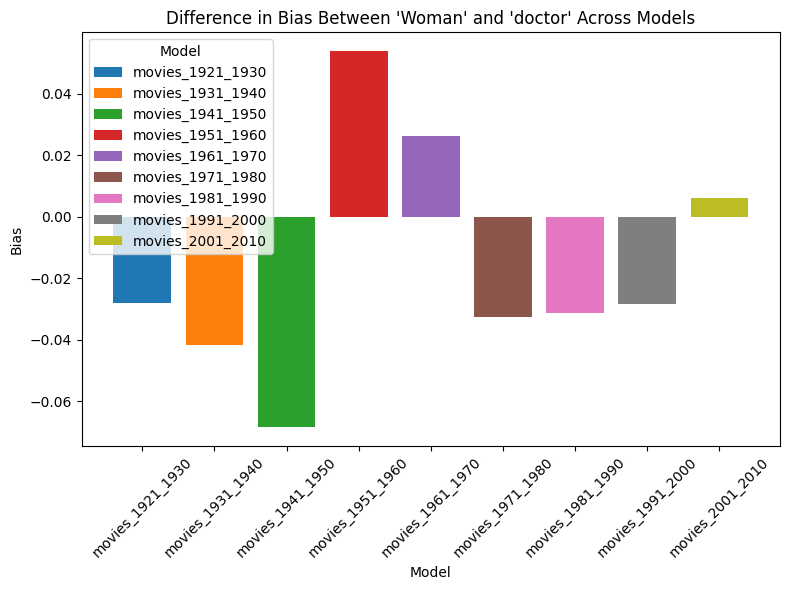

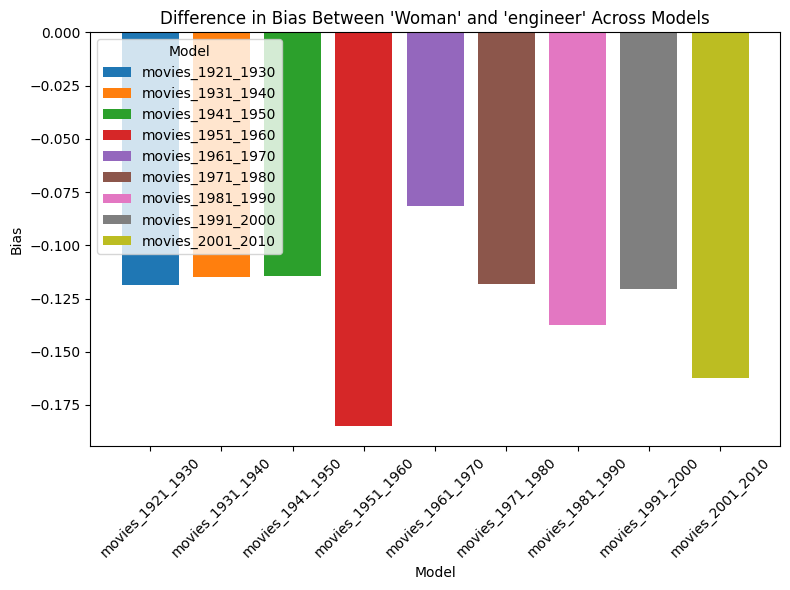

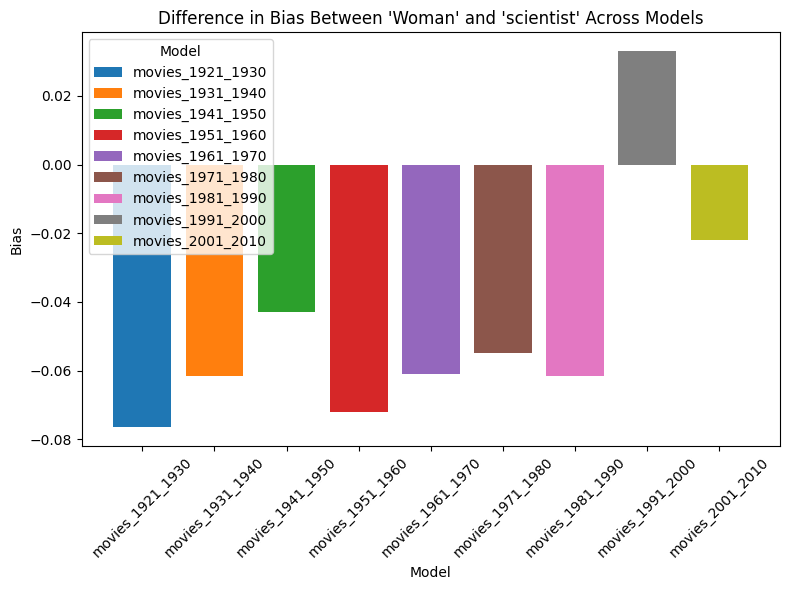

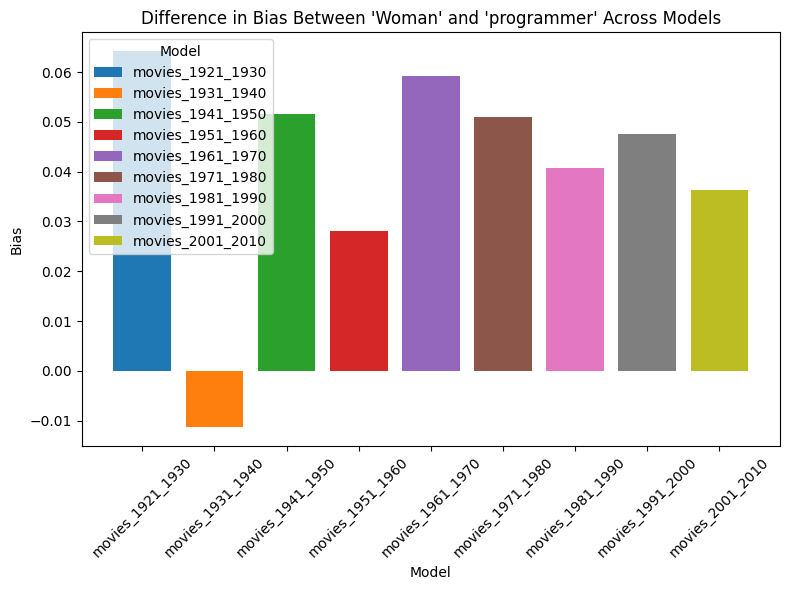

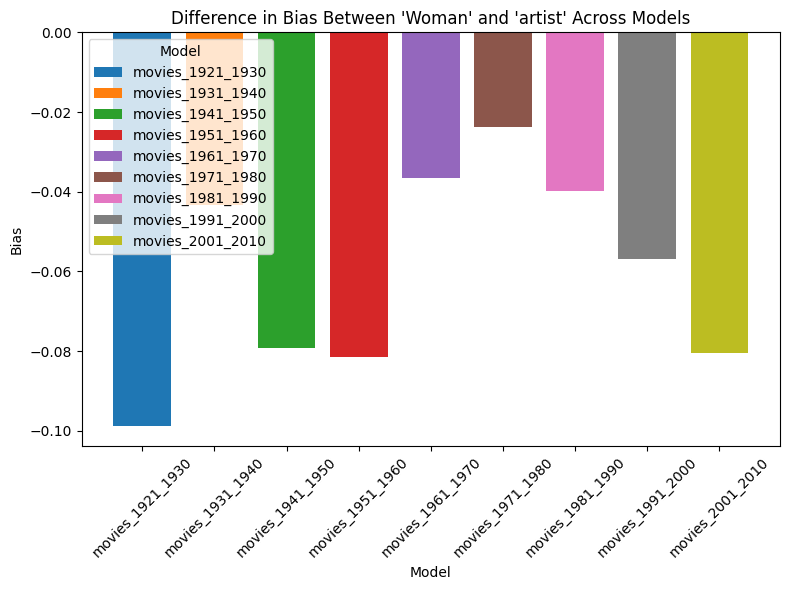

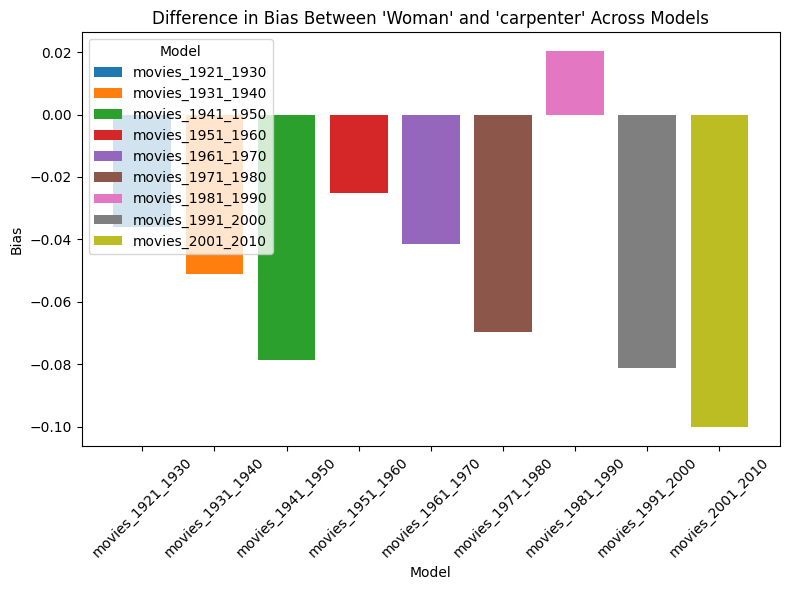

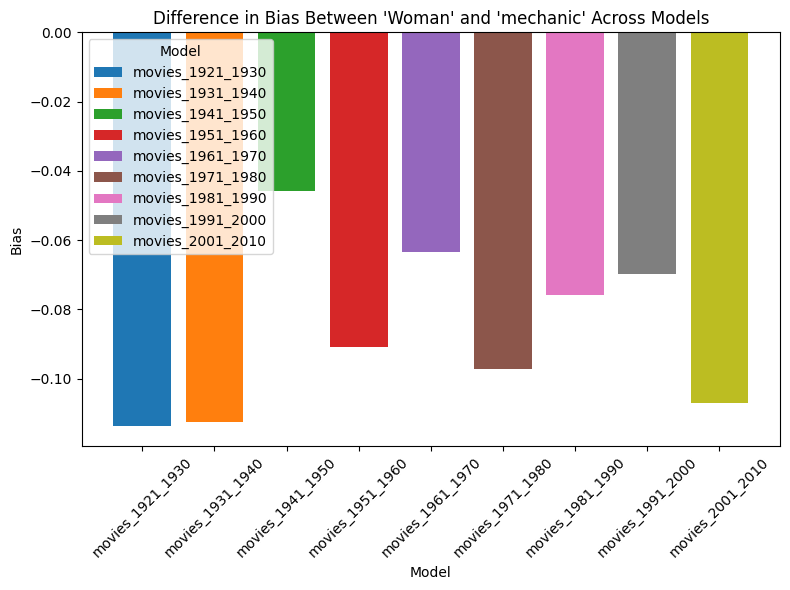

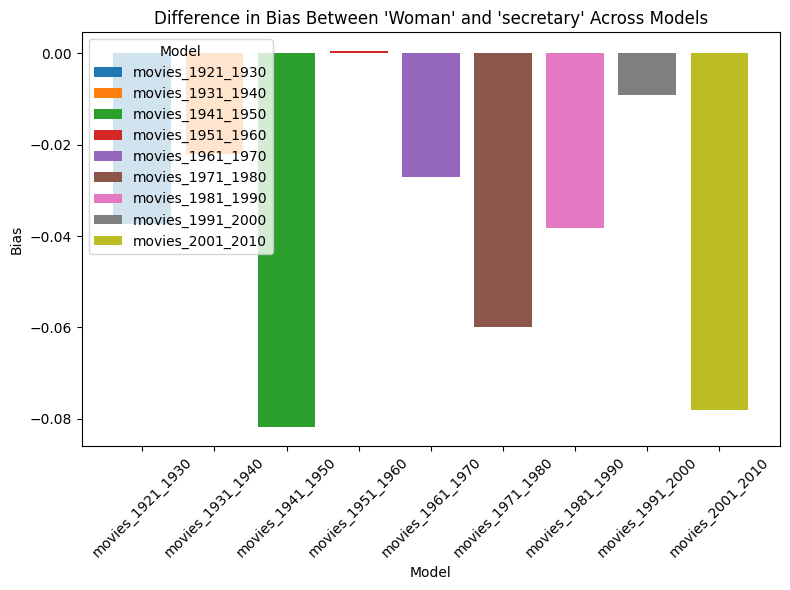

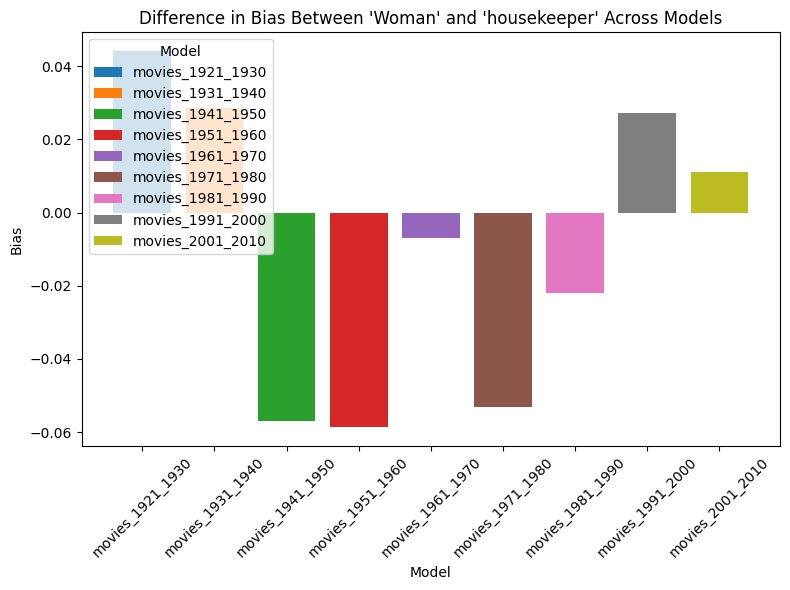

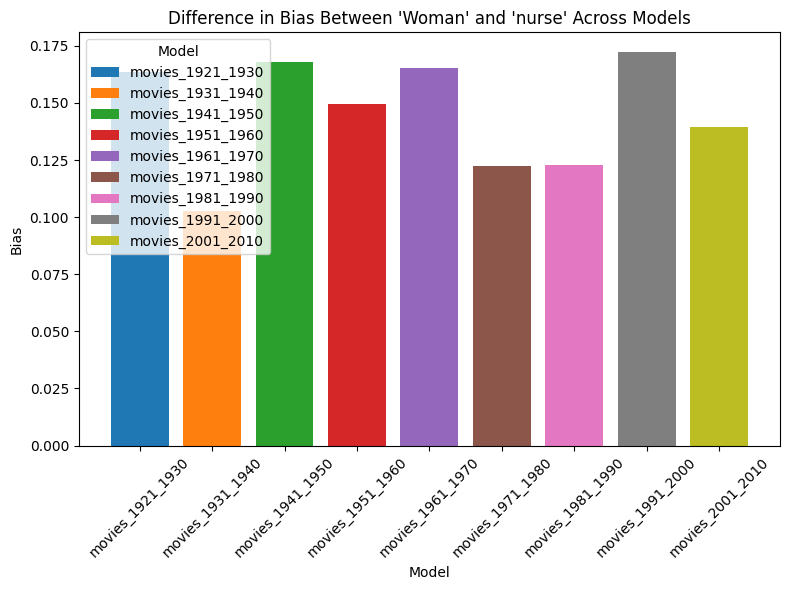

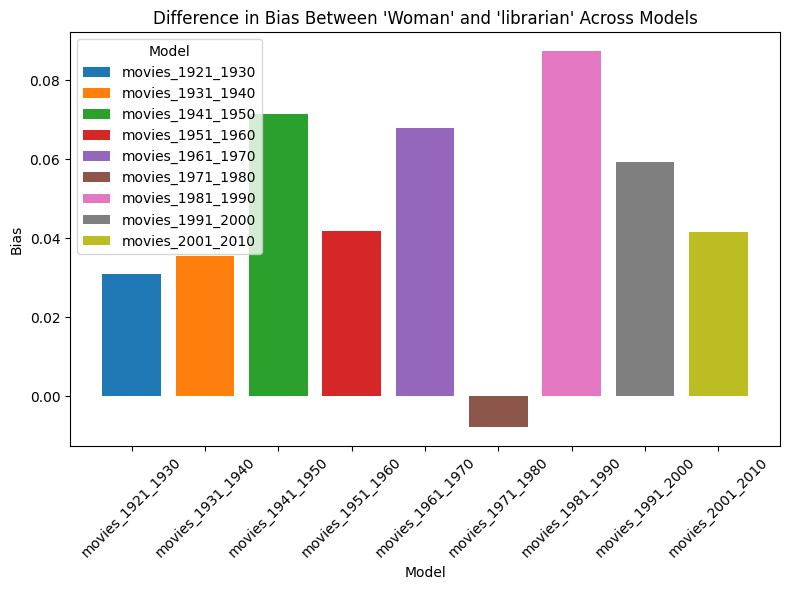

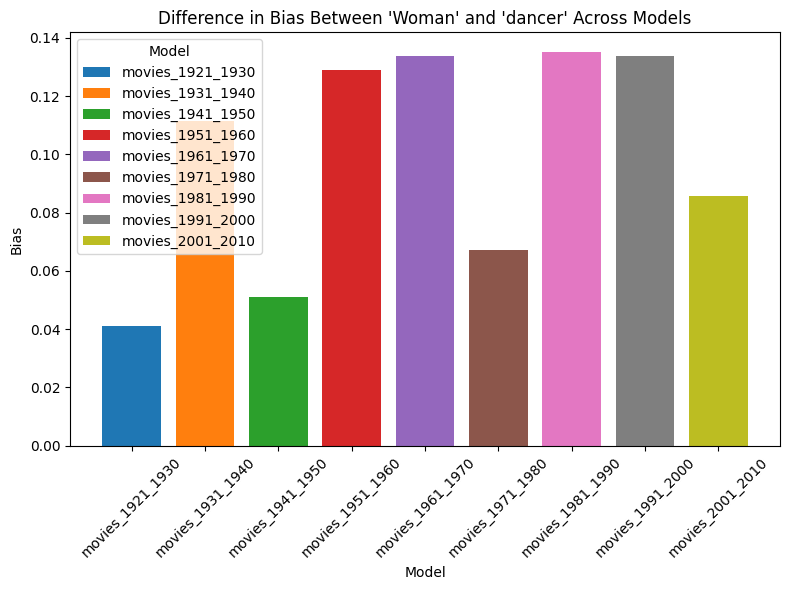

In [6]:
# Plot individual charts for each word pair
for occupation in occupations:
    plt.figure(figsize=(8, 6))
    for name in variable_names:
        plt.bar(name, bias_df.loc[occupation, name], label=name)
    plt.title(f"Difference in Bias Between 'Woman' and '{occupation}' Across Models")
    plt.xlabel('Model')
    plt.ylabel('Bias')
    plt.xticks(rotation=45)
    plt.legend(title='Model', loc='upper left')
    plt.tight_layout()
    plt.show()

# 2. Comparison with surveys of ethnic stereotypes.

- Common Chinese surnames: [ 'Wu', 'Li', 'Yang', 'Wang']

- Common White surnames = ['Smith', 'Johnson', 'Miller', 'Brown']

- Common Mexican surnames = ['Garcia', 'Rodriguez', 'Sanchez', 'Hernandez']

- Stereotypes = ['Irresponsible', 'Disorganized', 'Envious', 'Outrageous', 'Passive', 'Barbaric', 'Pompous', 'Aggressive','Unstable','Transparent','Monstrous','Forceful','Hateful','Fixed','Cruel','Active','Greedy','Sensitive', 'Bizarre', 'Hearty']


In [7]:
# Define the list of model prefixes
decades = {
    '1921_1930': 1920,
    '1931_1940': 1930,
    '1941_1950': 1940,
    '1951_1960':1950,
    '1961_1970':1960,
    '1971_1980':1970,
    '1981_1990':1980,
    '1991_2000':1990,
    '2001_2010':2000
}

In [8]:
# Define list of all common last names
CHINESE_LAST_NAMES = [ 'Wu', 'Li', 'Yang', 'Wang']
WHITE_LAST_NAMES = ['Smith', 'Johnson', 'Miller', 'Brown']
MEXICAN_LAST_NAMES = ['Garcia', 'Rodriguez', 'Sanchez', 'Hernandez']

# Define list of stereotype words
STEREOTYPE_WORDS = ['Irresponsible', 'Disorganized', 'Envious', 'Outrageous', 'Passive', 'Barbaric', 'Pompous', 'Aggressive','Unstable','Transparent','Monstrous','Forceful','Hateful','Fixed','Cruel','Active','Greedy','Sensitive', 'Bizarre', 'Hearty']
# Initialize an empty DataFrame to store bias values

In [9]:
# Defines the ethnic groups for analysis.
GROUPS = ['Chinese', 'Mexican']

# Initializes an empty list to store bias information.
bias_array=[]

#### Calculate bias

Conduct an analysis to compare ethnic stereotypes over decades using word embeddings, particularly focusing on last names

In [10]:
# Calculate bias for each group in every decaded with White names as baseline
for decade in decades:
    # Load the model
    model_filename = f"models/word2vec-movies_{decade}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    for group in GROUPS:
        if group == 'Chinese':
            group_names=CHINESE_LAST_NAMES
        else:
            group_names=MEXICAN_LAST_NAMES
        for stype in STEREOTYPE_WORDS:
            base_similarities = []
            group_similarities =[]
            for name in WHITE_LAST_NAMES:
                base_similarities.append(model.wv.similarity(name.lower(), stype.lower()))
            for name in group_names:
                group_similarities.append(model.wv.similarity(name.lower(), stype.lower()))
            bias = np.mean(group_similarities)-np.mean(base_similarities)
            d = {
                'Group': group,
                'Stereotype': stype,
                'Decade': decades[decade],
                'Bias': bias
            }
            bias_array.append(d)

#### Data storage

In [11]:
bias_df = pd.DataFrame.from_dict(bias_array)

#### Visualization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


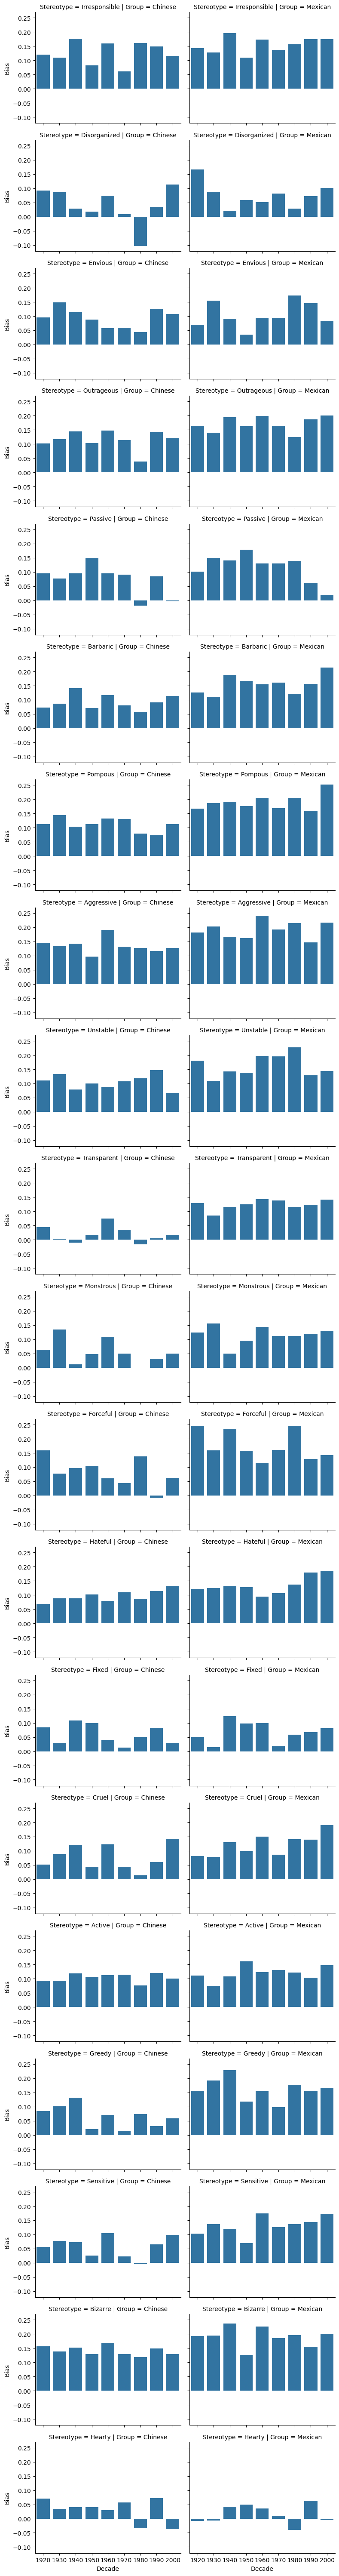

In [12]:
grid = sns.FacetGrid(bias_df, row='Stereotype', col='Group', sharex=True, sharey=True, aspect=4/3)
grid.map(sns.barplot, 'Decade', 'Bias')
plt.tight_layout()

# 3. Quantifying Changing Attitudes with Adjective Embeddings

We compare the word 'women' with various adjectives.

#### Read adjectives

In [13]:
ADJECTIVES = []

with open('./adjectives.txt', 'r') as file:
    for line in file:
        ADJECTIVES.append(line.strip())

#### Calculate bias 

Calculate bias for each group in every decaded with White names as baseline

In [14]:
similarity_array=[]

# Calculate bias for each group in every decaded with White names as baseline
for decade in decades:
    # Load the model
    model_filename = f"models/word2vec-movies_{decade}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    for adjective in ADJECTIVES:
        try:
            similarity = model.wv.similarity('female', adjective)
            d = {
                'Adjective': adjective,
                'Decade': decades[decade],
                'Sim': similarity
            }
            similarity_array.append(d)
        except:
            continue

#### Data storage

- Creates a DataFrame from the collected similarity information.
- Pivots the DataFrame to have adjectives as rows, decades as columns, and similarity scores as values.

In [15]:
sim_df = pd.DataFrame.from_dict(similarity_array).pivot_table(index=['Adjective'],columns='Decade',values='Sim')


#### Visualization

<Axes: xlabel='Decade', ylabel='Decade'>

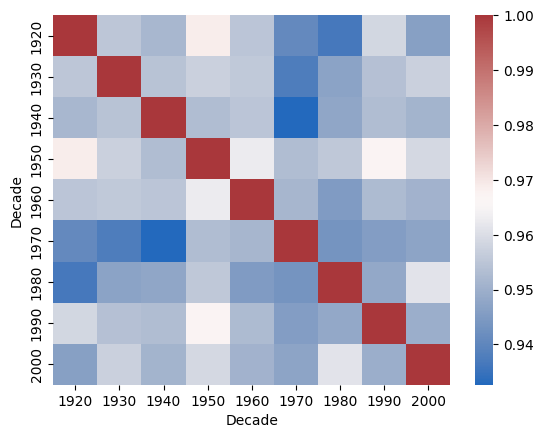

In [16]:
sns.heatmap(sim_df.corr(), cmap='vlag')

# 4. Individual words whose biases changed over time

In [17]:
# Define the list of model prefixes
variable_names = [
    'movies_1921_1930',
    'movies_1931_1940',
    'movies_1941_1950',
    'movies_1951_1960',
    'movies_1961_1970',
    'movies_1971_1980',
    'movies_1981_1990',
    'movies_1991_2000',
    'movies_2001_2010'
]

# Define word lists
competence_words = ['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 'thoughtful', 'sage',
'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent', 'apt', 'genius', 'wise']  
physical_appearance_words = ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat', 'weak', 'thin', 'pretty',
'beautiful', 'strong']  

# Initialize empty DataFrames to store aggregated bias values over time
aggregated_bias_competence = pd.DataFrame(index=competence_words, columns=['Mean_Bias'])
aggregated_bias_appearance = pd.DataFrame(index=physical_appearance_words, columns=['Mean_Bias'])


#### Calculate bias

In [18]:
# Calculate bias for each model for competence words
for name in variable_names:
    # Load the model
    model_filename = f"models/word2vec-{name}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    
    # Calculate bias between "woman" and each competence word
    for word in competence_words:
        if word in model.wv.key_to_index:  # Check if the word is present in the vocabulary
            bias = model.wv.similarity('woman', word) - model.wv.similarity('man', word)
            # Accumulate bias values over time
            if word in aggregated_bias_competence.index:
                if pd.isnull(aggregated_bias_competence.loc[word, 'Mean_Bias']):
                    aggregated_bias_competence.loc[word, 'Mean_Bias'] = bias
                else:
                    aggregated_bias_competence.loc[word, 'Mean_Bias'] += bias
        else:
            print(f"Word '{word}' not present in the vocabulary of model '{name}'")

# Calculate bias for each model for physical appearance words
for name in variable_names:
    # Load the model
    model_filename = f"models/word2vec-{name}-text.model"
    model = gensim.models.Word2Vec.load(model_filename)
    
    # Calculate bias between "woman" and each physical appearance word
    for word in physical_appearance_words:
        if word in model.wv.key_to_index:  # Check if the word is present in the vocabulary
            bias = model.wv.similarity('woman', word) - model.wv.similarity('man', word)
            # Accumulate bias values over time
            if word in aggregated_bias_appearance.index:
                if pd.isnull(aggregated_bias_appearance.loc[word, 'Mean_Bias']):
                    aggregated_bias_appearance.loc[word, 'Mean_Bias'] = bias
                else:
                    aggregated_bias_appearance.loc[word, 'Mean_Bias'] += bias
        else:
            print(f"Word '{word}' not present in the vocabulary of model '{name}'")


Word 'precocious' not present in the vocabulary of model 'movies_1921_1930'
Word 'sagacious' not present in the vocabulary of model 'movies_1921_1930'
Word 'inventive' not present in the vocabulary of model 'movies_1921_1930'
Word 'adaptable' not present in the vocabulary of model 'movies_1921_1930'
Word 'discerning' not present in the vocabulary of model 'movies_1921_1930'
Word 'judicious' not present in the vocabulary of model 'movies_1921_1930'
Word 'venerable' not present in the vocabulary of model 'movies_1921_1930'
Word 'precocious' not present in the vocabulary of model 'movies_1931_1940'
Word 'sagacious' not present in the vocabulary of model 'movies_1931_1940'
Word 'inventive' not present in the vocabulary of model 'movies_1931_1940'
Word 'adaptable' not present in the vocabulary of model 'movies_1931_1940'
Word 'discerning' not present in the vocabulary of model 'movies_1931_1940'
Word 'judicious' not present in the vocabulary of model 'movies_1931_1940'
Word 'venerable' not 

In [19]:
# Calculate mean bias over time
aggregated_bias_competence['Mean_Bias'] /= len(variable_names)
aggregated_bias_appearance['Mean_Bias'] /= len(variable_names)

#### Visualization

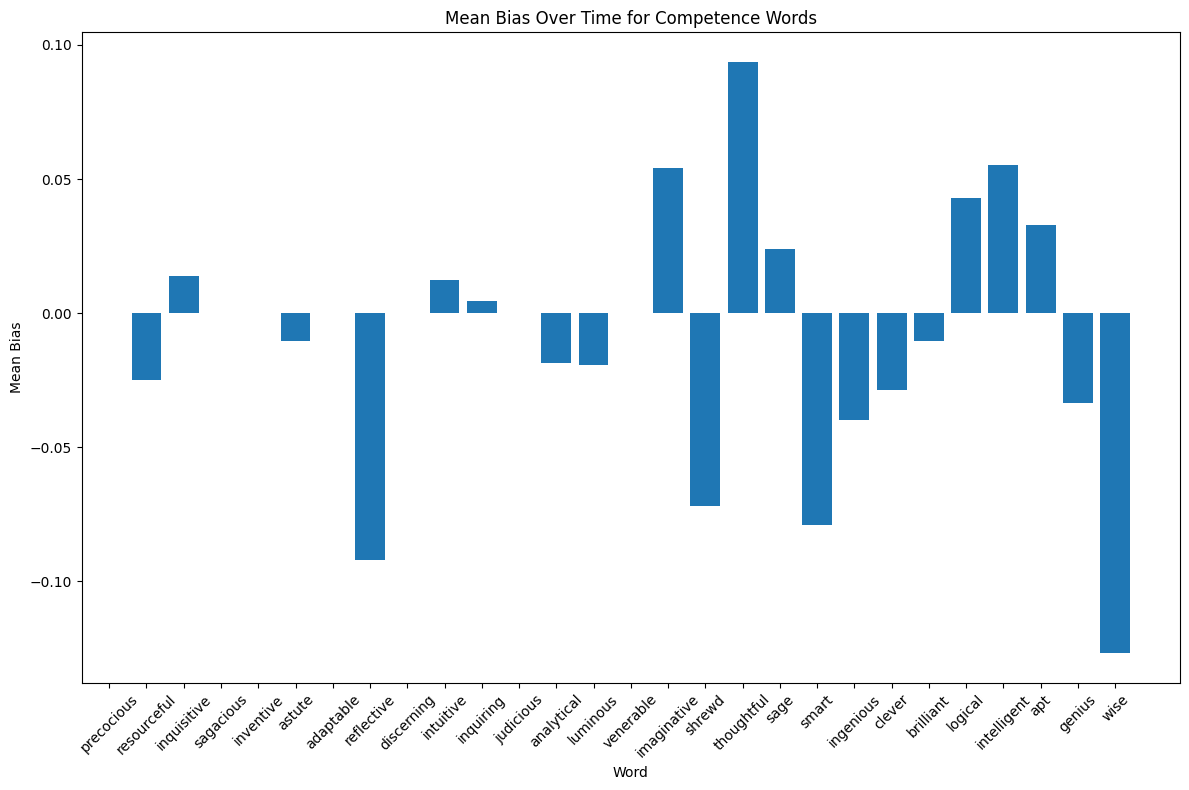

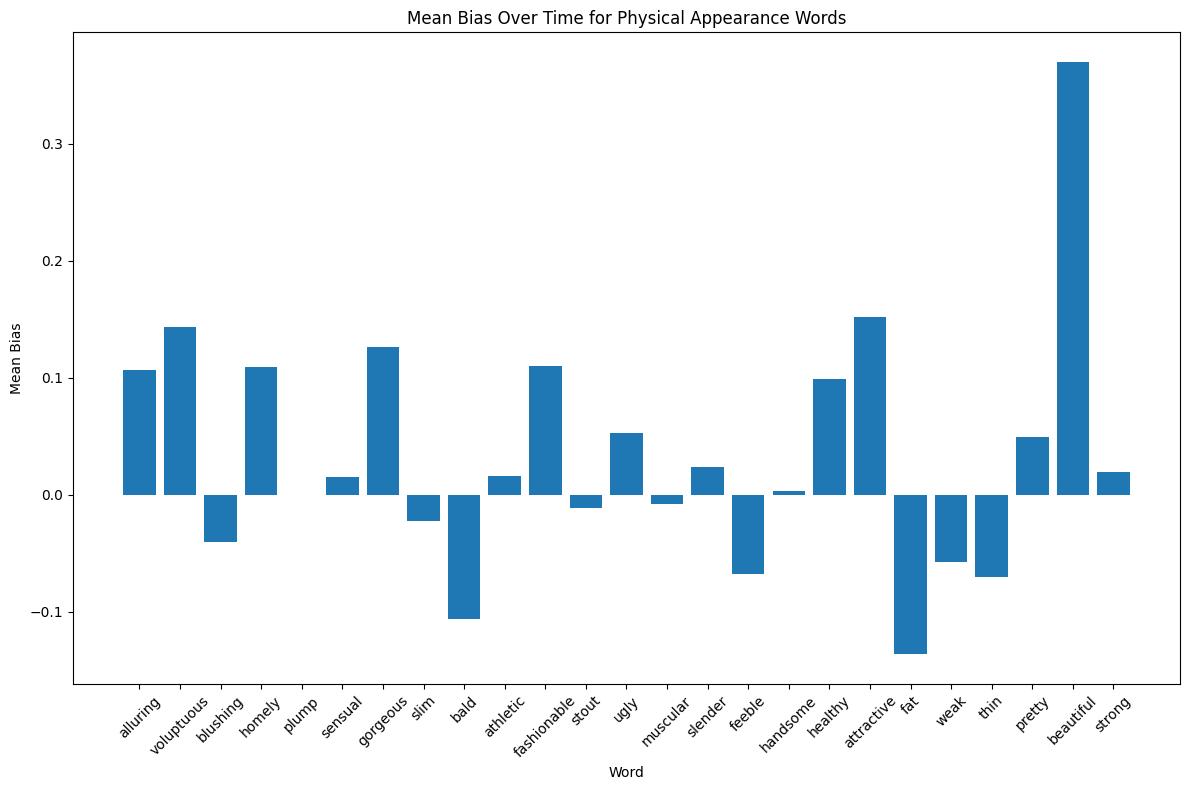

In [20]:
# Plotting mean bias over time for competence words
plt.figure(figsize=(12, 8))
plt.bar(aggregated_bias_competence.index, aggregated_bias_competence['Mean_Bias'])
plt.title('Mean Bias Over Time for Competence Words')
plt.xlabel('Word')
plt.ylabel('Mean Bias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting mean bias over time for physical appearance words
plt.figure(figsize=(12, 8))
plt.bar(aggregated_bias_appearance.index, aggregated_bias_appearance['Mean_Bias'])
plt.title('Mean Bias Over Time for Physical Appearance Words')
plt.xlabel('Word')
plt.ylabel('Mean Bias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plots display the ```mean bias over time``` for competence words and physical appearance words. In competence words, ```"wise"``` exhibits the highest negative bias, whereas ```"thoughtful"``` demonstrates the highest positive bias; in physical appearance words, ```"beautiful"``` shows the highest positive bias.

- the negative bias towards "wise" and positive bias towards "beautiful" could indicate underlying gender biases and societal expectations regarding intelligence and physical attractiveness.

# 5. Trends in Asian Stereotypes

#### Load Models

In [21]:
from gensim.models import Word2Vec

model_paths = {
    '1920s': 'word2vec-movies_1921_1930-text.model',
    '1930s': 'word2vec-movies_1931_1940-text.model',
    '1940s': 'word2vec-movies_1941_1950-text.model',
    '1950s': 'word2vec-movies_1951_1960-text.model',
    '1960s': 'word2vec-movies_1961_1970-text.model',
    '1970s': 'word2vec-movies_1971_1980-text.model',
    '1980s': 'word2vec-movies_1981_1990-text.model',
    '1990s': 'word2vec-movies_1991_2000-text.model',
    '2000s': 'word2vec-movies_2001_2010-text.model',
}

models = {decade: Word2Vec.load(f'models/{model_path}') for decade, model_path in model_paths.items()}

#### Defining Lists of Last Names and Adjectives

In [22]:
asian_last_names = ['chung', 'liu', 'wong', 'huang', 'ng', 'hu', 'chu', 'chen', 'lin', 'liang', 'wang', 'wu', 'yang', 'tang', 'chang', 'hong', 'li'] #17 asian_last_names

white_last_names = ["smith", "johnson", "williams", "brown", "jones","miller", "davis", "garcia", "rodriguez", "wilson","martinez", "anderson", 
                           "taylor", "thomas", "martin", "jackson", "thompson"] #17 white_last_names

In [23]:
good_adjectives = ["intelligent", "diligent", "compassionate", "generous", "curious", "empathetic", "supportive", "kind", "creative", "reliable"]
bad_adjectives = ["cruel", "selfish", "greedy", "malicious", "deceitful", "ruthless", "arrogant", "vindictive", "negligent", "ignorant"]
neutral_adjectives = ["obedient", "independent", "reserved", "practical", "methodical", "objective", "skeptical", "traditional", "innovative", "pensive"]

#### Calculate Cosine similarity Over Time

In [24]:
adjective_bias_over_time = {}
adjectives  = good_adjectives # Useing good as an example here

for decade, model in models.items():
    # Ensure the Asian last names are present in the model's vocabulary
    valid_names = [name for name in asian_last_names if name in model.wv.key_to_index]
    
    # If there are no valid names in the model, skip this decade
    if not valid_names:
        continue

    # Calculate the centroid vector for valid Asian last names
    asian_name_vectors = np.array([model.wv[name] for name in valid_names])
    asian_centroid = np.mean(asian_name_vectors, axis=0)
    
    # Normalize the centroid vector
    asian_centroid_norm = asian_centroid / np.linalg.norm(asian_centroid)
    
    for adj in adjectives:
        if adj in model.wv.key_to_index:
            # Get the normalized vector for the adjective
            adj_vector_norm = model.wv[adj] / np.linalg.norm(model.wv[adj])
            # Calculate cosine similarity manually
            similarity = np.dot(asian_centroid_norm, adj_vector_norm)
            adjective_bias_over_time.setdefault(adj, []).append((decade, similarity))

#### Visualization

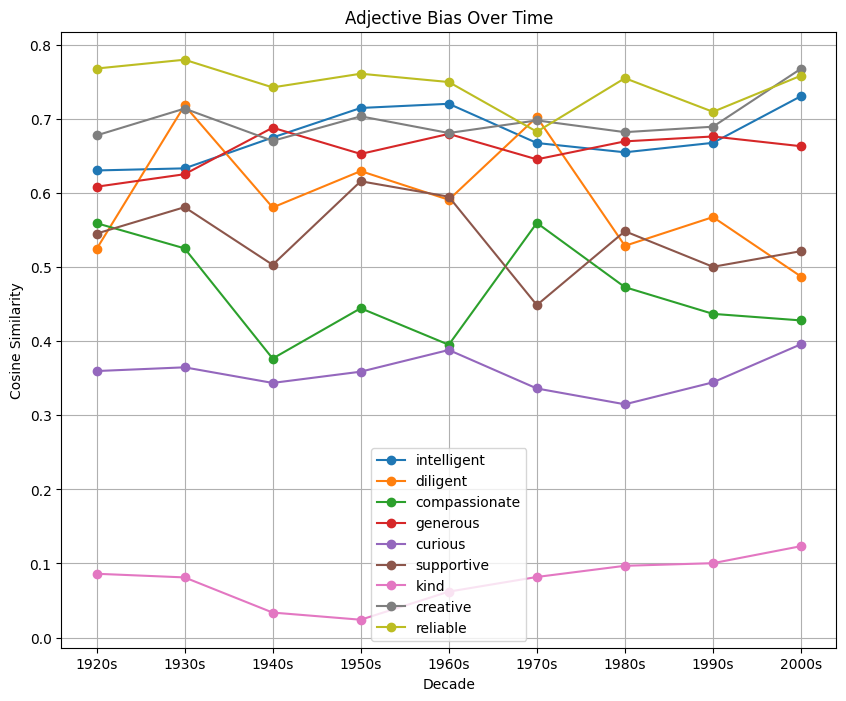

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))


for adj, data in adjective_bias_over_time.items():
    decades, similarities = zip(*data)
    plt.plot(decades, similarities, marker='o', label=adj)


plt.title('Adjective Bias Over Time')
plt.xlabel('Decade')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)  

plt.show()

#### Calculate Adjective Bias Over Time

In [ ]:
# asian bias score calculation
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Function to calculate the normalized centroid of vectors for a list of names
def calculate_centroids(model, name_list):
    # Filter out names that are not in the model's vocabulary
    valid_names = [name for name in name_list if name in model.wv.key_to_index]
    # Retrieve and stack the vectors for the valid names
    name_vectors = np.array([model.wv[name] for name in valid_names])
    # Calculate the mean vector (centroid) of these vectors
    centroid = np.mean(name_vectors, axis=0)
    # Normalize and return the centroid vector
    return centroid / np.linalg.norm(centroid)

# Function to compute bias scores based on distance between adjective vectors and centroids
def compute_bias_scores(models, asian_centroids, white_centroids, adjectives):
    # Initialize a dictionary to hold bias scores for each decade
    bias_scores = {decade: 0 for decade in models.keys()}
    # Iterate over each decade and its corresponding model
    for decade, model in models.items():
        # For each adjective, calculate bias if the adjective is in the model's vocabulary
        for adj in adjectives:
            if adj in model.wv.key_to_index:
                # Get the vector for the adjective
                adj_vector = model.wv[adj]
                # Calculate the distance from the adjective vector to both centroids
                distance_to_asian = np.linalg.norm(adj_vector - asian_centroids[decade])
                distance_to_white = np.linalg.norm(adj_vector - white_centroids[decade])
                # Update the bias score for the decade by the difference in distances
                bias_scores[decade] += (distance_to_white - distance_to_asian)
    # Return the dictionary of bias scores
    return bias_scores

# Function to plot the bias scores over time
def plot_bias_over_time(bias_scores, title):
    # Sort the decades and get the corresponding scores
    decades = sorted(bias_scores.keys())
    scores = [bias_scores[decade] for decade in decades]

    # Set up the plot
    plt.figure(figsize=(10, 5))
    plt.plot(decades, scores, marker='o')
    plt.title(f'Bias Score Over Time for {title}')
    plt.xlabel('Decades')
    plt.ylabel('Relative Norm Distance Bias Score')
    # Add a horizontal line at y=0 for reference
    plt.axhline(0, color='grey', lw=0.8, linestyle='--')
    # Enable grid
    plt.grid(True)
    # Display the plot
    plt.show()

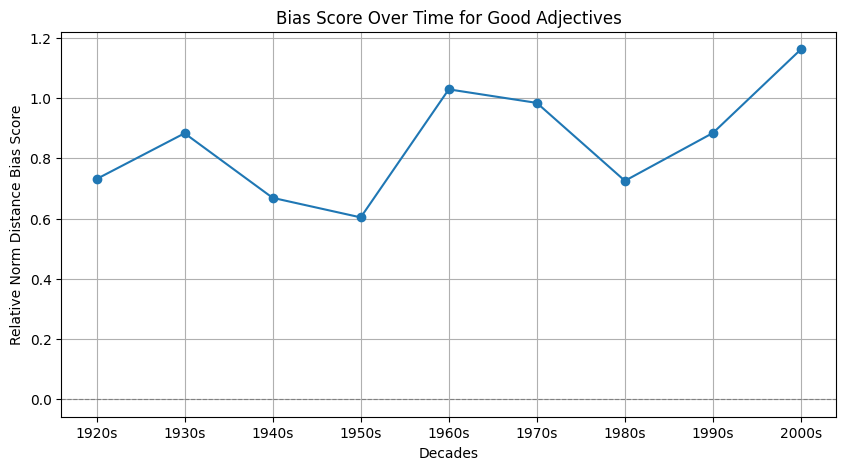

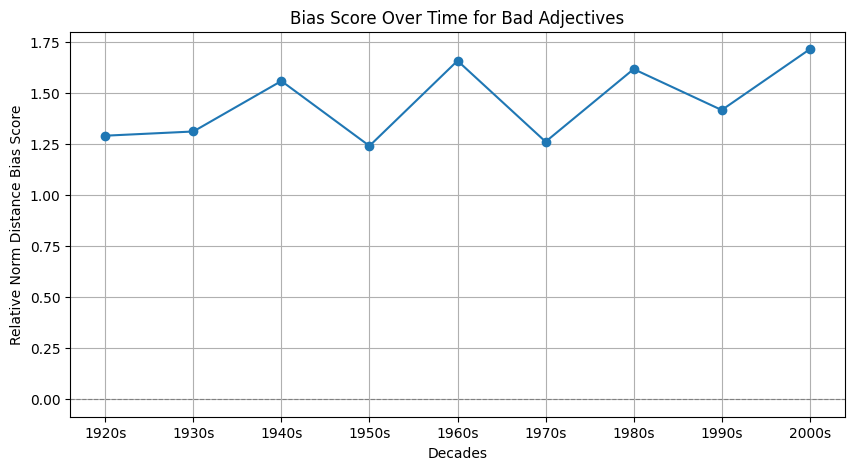

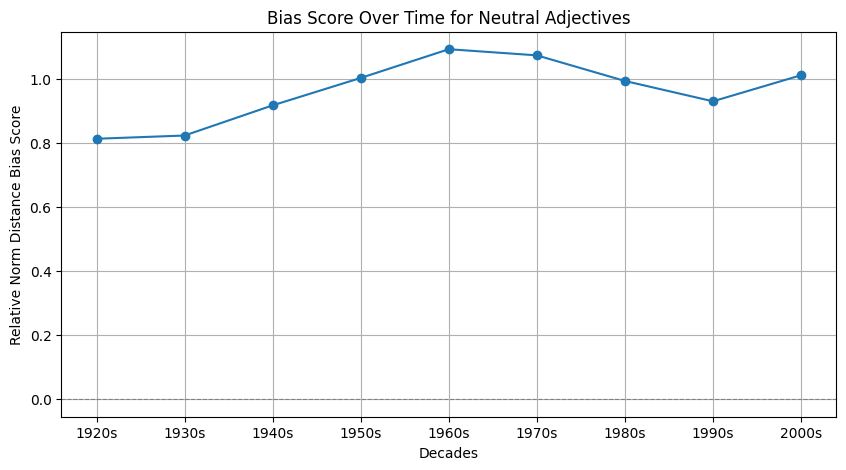

In [26]:
# Pre-calculate centroids for Asian and White names across different decades
asian_centroids = {}
white_centroids = {}
for decade, model in models.items():
    asian_centroids[decade] = calculate_centroids(model, asian_last_names)
    white_centroids[decade] = calculate_centroids(model, white_last_names)

# Compute bias scores for good, bad, and neutral adjectives
good_bias_scores = compute_bias_scores(models, asian_centroids, white_centroids, good_adjectives)
bad_bias_scores = compute_bias_scores(models, asian_centroids, white_centroids, bad_adjectives)
neutral_bias_scores = compute_bias_scores(models, asian_centroids, white_centroids, neutral_adjectives)

# Plot the bias scores over time for different sets of adjectives
plot_bias_over_time(good_bias_scores, 'Good Adjectives')
plot_bias_over_time(bad_bias_scores, 'Bad Adjectives')
plot_bias_over_time(neutral_bias_scores, 'Neutral Adjectives')
